In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [4]:
amazon_ratings = pd.read_csv('C:/Users/Manas/OneDrive/Desktop/Product/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot: xlabel='ProductId'>

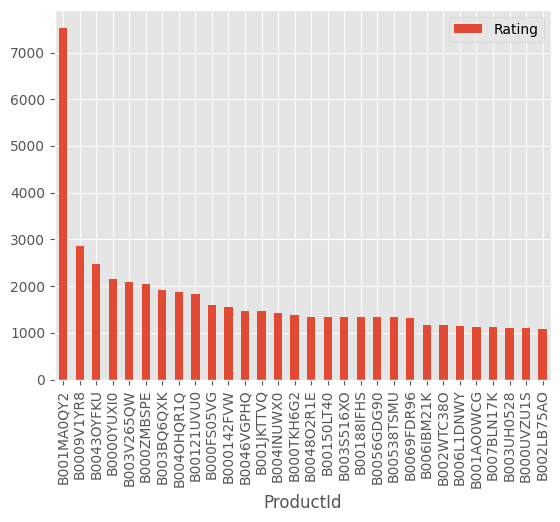

In [6]:
most_popular.head(30).plot(kind = "bar")

In [7]:
amazon_ratings1 = amazon_ratings.head(10000)

In [8]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_utility_matrix.shape

(9697, 886)

In [10]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape
X1 = X

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.98229059, -0.84887714, ...,  0.27509753,
         0.28460752, -0.2839606 ],
       [-0.98229059,  1.        ,  0.89748361, ..., -0.29155528,
        -0.22821717,  0.30935446],
       [-0.84887714,  0.89748361,  1.        , ..., -0.27742406,
        -0.2471153 ,  0.22816748],
       ...,
       [ 0.27509753, -0.29155528, -0.27742406, ...,  1.        ,
         0.13468189,  0.00799444],
       [ 0.28460752, -0.22821717, -0.2471153 , ...,  0.13468189,
         1.        ,  0.73943601],
       [-0.2839606 ,  0.30935446,  0.22816748, ...,  0.00799444,
         0.73943601,  1.        ]])

In [14]:
correlation_df = pd.DataFrame(correlation_matrix)

# Now you can use the corr() method on the DataFrame
correlation_matrix_corr = correlation_df.corr()
corre = correlation_matrix_corr.head(10)

<AxesSubplot: >

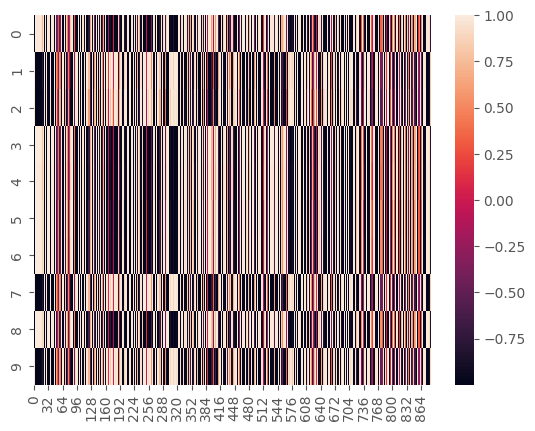

In [15]:
import seaborn
seaborn. heatmap (corre)

In [16]:
X.index[99]

'6117036094'

In [17]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [18]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0205616461',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304511146',
 '1304622223',
 '1304622460',
 '1304624544',
 '1412759676']

In [20]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

C:\Users\VEDANTI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


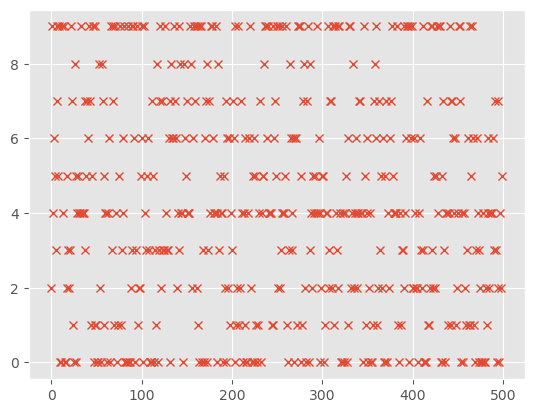

In [ ]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, "x")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 cutting
 metal
 drill
 saw
 blade
 lithium
 20
 tool
 steel
 hole
Cluster 1:
 wall
 panels
 proposition
 wood
 nbsp
 residents
 california
 65
 ft
 painted
Cluster 2:
 rug
 vary
 100
 shades
 ft
 slightly
 order
 product
 stakes
 bamboo
Cluster 3:
 storage
 shelves
 lbs
 duty
 heavy
 steel
 easy
 adjustable
 unit
 capacity
Cluster 4:
 outdoor
 cedar
 post
 decks
 wood
 treated
 color
 water
 stair
 insulation
Cluster 5:
 water
 gal
 toilet
 flush
 tank
 easy
 bowl
 heater
 offers
 watering
Cluster 6:
 frame
 patio
 fabric
 outdoor
 collection
 dining
 cushions
 steel
 coated
 wicker
Cluster 7:
 use
 ft
 tile
 paint
 finish
 piece
 trim
 easy
 snow
 design
Cluster 8:
 air
 fan
 help
 control
 speed
 cooling
 power
 ft
 helps
 kit
Cluster 9:
 light
 nickel
 watt
 bulb
 led
 fixture
 lighting
 bulbs
 cabinet
 switch


In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("cutting tool")

Cluster 0:
 cutting
 metal
 drill
 saw
 blade
 lithium
 20
 tool
 steel
 hole


In [ ]:
show_recommendations("steel drill")

Cluster 0:
 cutting
 metal
 drill
 saw
 blade
 lithium
 20
 tool
 steel
 hole


In [ ]:
show_recommendations("water")

Cluster 5:
 water
 gal
 toilet
 flush
 tank
 easy
 bowl
 heater
 offers
 watering
